In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler
from colorama import Fore
from sklearn import metrics
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA 
import math
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('../clean_data/BigDS_train.csv')
X = data.drop(["Price"] , axis=1)
y = data["Price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2525)
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [3]:
def models_score(x_train, x_val, y_train, y_val):    
    models = {
        "Linear": LinearRegression(),
         }
    evalutes = {}
    i = 0
    maes = []
    rmse = []
    mape = []
    names = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_val) 
        names.append(name)
        maes.append(mean_absolute_error(y_val,y_pred))
        rmse.append(math.sqrt(mean_squared_error(y_val,y_pred)))
        mape.append(mean_absolute_percentage_error(y_val, y_pred))
    evalutes = {'Algorithms': names, 'MAE': maes, 'RMSE': rmse, "MAPE":mape}
    model_scores = pd.DataFrame(evalutes)
    return model_scores

In [4]:
score = models_score(X_train_scaled, X_val_scaled, y_train, y_val)
score

,Algorithms,MAE,RMSE,MAPE
0,Linear,1.363163e+06,1.703268e+06,0.545841


In [ ]:
scores = []
for i in range(1, 12):
  pca = PCA(n_components=i)
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_val_pca = pca.transform(X_val)
  scores.append(models_score(X_train_pca, X_val_pca, y_train, y_val))

for score in scores:
  print(score)

  Algorithms           MAE          RMSE      MAPE
0     Linear  1.508153e+06  2.091907e+06  0.632355
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.507295e+06  2.090553e+06  0.631625
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.507084e+06  2.090342e+06  0.631457
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.511815e+06  2.025686e+06  0.593684
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.512141e+06  2.025313e+06  0.594625
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.530127e+06  1.931298e+06  0.608427
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.530017e+06  1.931310e+06  0.608457
  Algorithms          MAE          RMSE      MAPE
0     Linear  1528732.108  1.932123e+06  0.608465
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.531870e+06  1.932945e+06  0.610661
  Algorithms           MAE          RMSE      MAPE
0     Linear  1.533938e+06  1.921

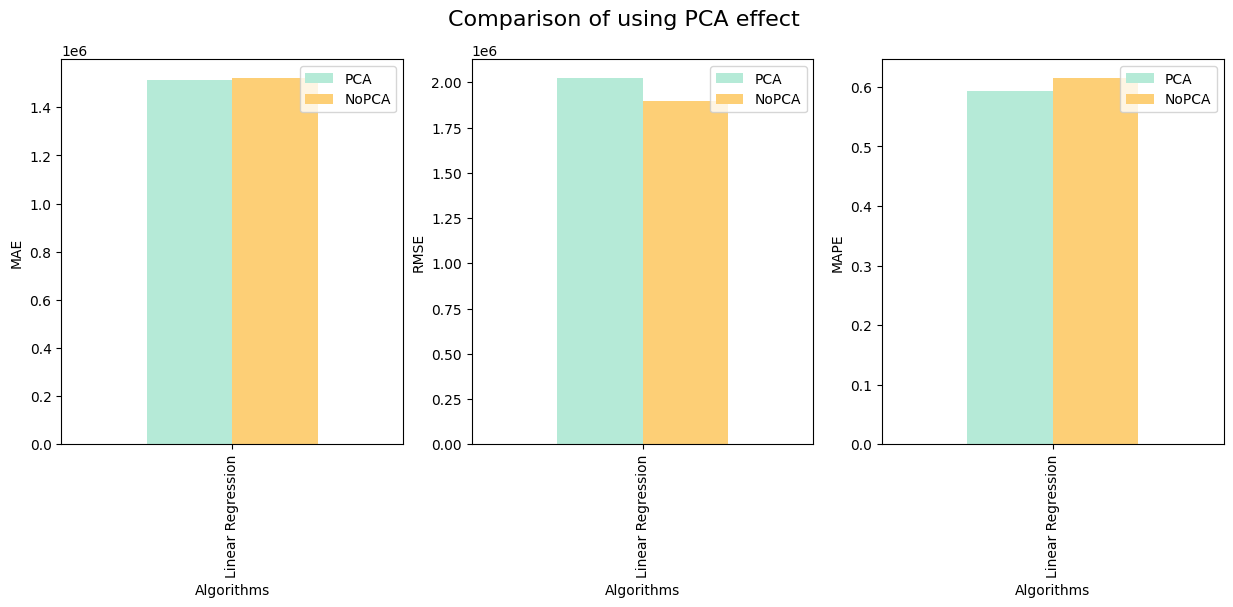

In [12]:
metrics = ["MAE", "RMSE", "MAPE"]
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Comparison of using PCA effect', fontsize=16) 
best_score = scores[3]
for i in range(len(metrics)):
    df_comparea_pca = pd.DataFrame({
        'Algorithms': ["Linear Regression"],
        'PCA': [best_score[metrics[i]][0]],
        'NoPCA': [score[metrics[i]][0]],
    })
    df_comparea_pca.plot(x="Algorithms", y=["PCA", "NoPCA"], kind="bar", ax = axs[i], color=['#b5ead7', '#fdcf76']
)
    axs[i].set_ylabel(metrics[i])

In [55]:
class Model:
    def __init__(self):
        self.model = None

    def predict(self, X_val):
        return self.model.predict(X_val)


class ModelLinearRegression(Model):
    def __init__(self, regular=False, weights=0):
        super().__init__()
        self.weights = weights
        self.regular = regular

    @staticmethod
    def cost_function(X, y, w):
        m = len(y)
        y_pred = X.dot(w)
        cost = np.sum((y_pred - y) ** 2) / (2 * m)
        return cost

    @staticmethod
    def gradient(X, y, w):
        m = len(y)
        y_pred = X.dot(w)
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        return dw

    def train(self, X, y, learning_rate=0.01, epochs=10000):
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values.reshape(-1, 1)
        elif y.ndim == 1:
            y = y.reshape(-1, 1)

        X = np.c_[np.ones(X.shape[0]), X]  # Add bias column
        w = np.zeros((X.shape[1], 1))  # Initialize weights

        costs = []

        for i in range(epochs):
            dw = self.gradient(X, y, w)
            w = w - learning_rate * dw
            cost = self.cost_function(X, y, w)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}, w = {w.ravel()}")

        # Plot cost function
        plt.plot(range(epochs), costs)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Cost Function during Training")
        plt.grid(True)
        plt.show()

        self.weights = w
        self.model = lambda X: np.c_[np.ones(X.shape[0]), X].dot(self.weights)  # Define model for prediction
        return w

    def evaluate(self, y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        def predict(self, X):
            X = np.c_[np.ones(X.shape[0]), X]  # Add bias column
            y_pred = X.dot(self.weights)
            return y_pred
        r2 = r2_score(y_true, y_pred)
        return mae, rmse, mape, r2

    def plot_yy(self, width, height, y_pred, y_val):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        plt.scatter(y_val, y_pred, color='red')
        plt.plot(y_val, y_val)
        plt.grid()
        plt.xlabel('Actual price (Thousand VND)')
        plt.ylabel('Predicted price (Thousand VND)')
        plt.title('Scatter plot between actual y and predicted y')
        plt.show()


Iteration 0: Cost = 7957834281972.993, w = [ 3.42981085e+04  5.54189298e+03 -1.43113330e+03  7.62452411e+03
 -7.08124049e+03 -1.99633070e+03 -2.16247502e+03  2.33292905e+03
 -4.63328397e+02 -2.59436897e+03 -4.32626460e+03  5.94655889e+03
 -1.62931634e+03 -8.34302314e+02  4.37002770e+01  2.70354321e+02
  3.14432616e+02  8.39547002e+02  2.17015853e+03  1.56820993e+03
 -1.63445349e+03  5.18734225e+02 -9.19699423e+02 -3.03113241e+03
  6.40748758e+02 -5.11064430e+02 -5.63565704e+02  7.22579079e+02
  4.33845932e+02 -9.42019548e+02 -6.20690587e+02 -2.36875066e+02
  1.48398949e+03 -1.35760855e+02 -4.12488251e+02 -2.38810147e+02
  1.37595268e+02  1.15253520e+03  1.28397774e+02 -1.99563380e+02
  1.73514037e+03 -1.60212821e+03  7.41311638e+02 -9.63932787e+02
 -2.04538692e+03  8.48339603e+01 -2.51000491e+01 -4.09289888e+02
  6.70508783e+02  2.52046380e+02 -5.55886085e+02  4.80815190e+02
 -7.20718066e+02  1.67491598e+03 -3.01009439e+01]
Iteration 100: Cost = 2421566457296.981, w = [ 2.18694337e+06 

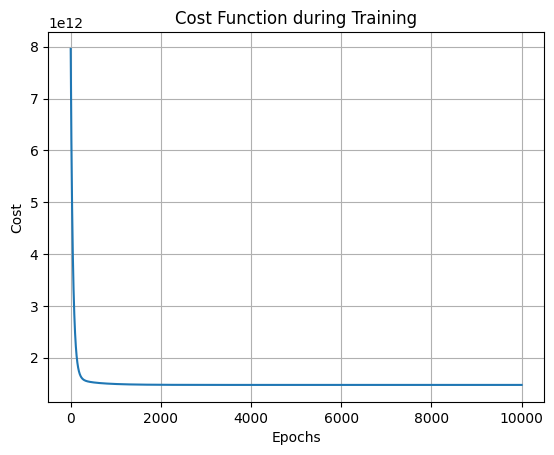

MAE: 1363163.2089324172
RMSE: 1703268.1234764173
MAPE: 0.5458416535835637
R2: 0.34626607506418194


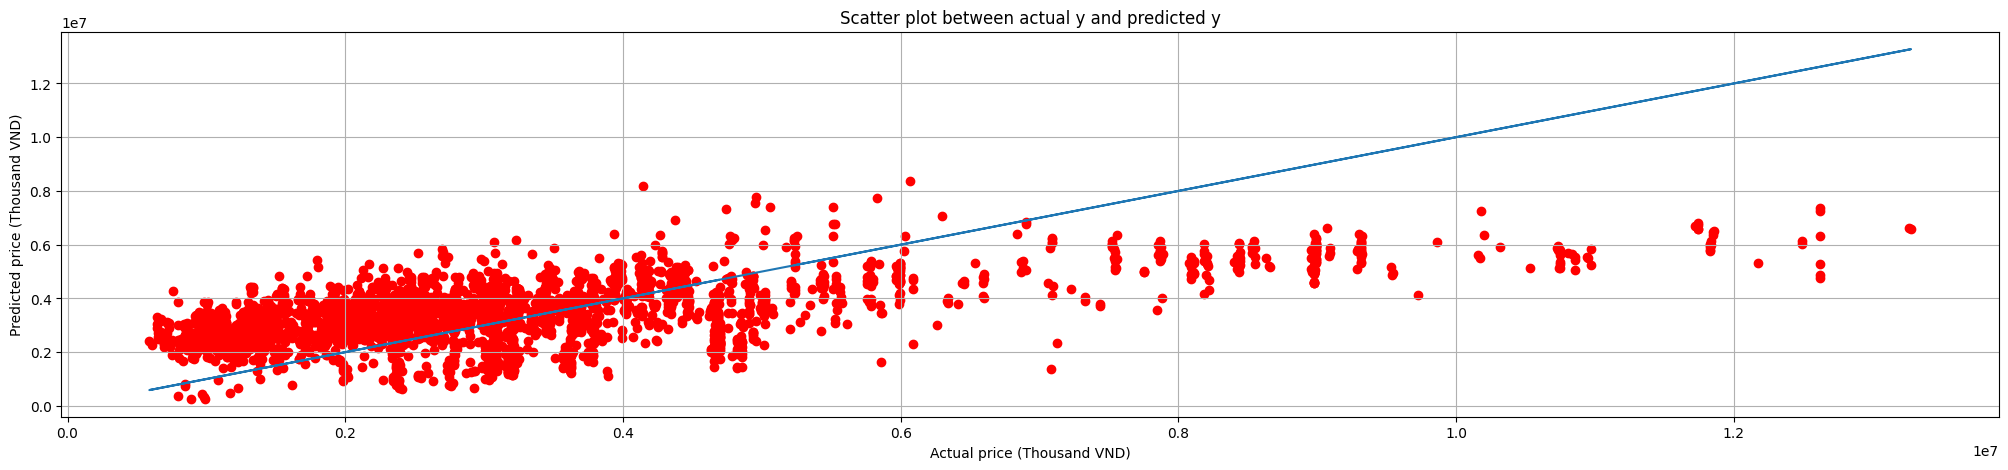

In [14]:
if isinstance(y_train, (pd.Series, pd.DataFrame)):
    y_train = y_train.values.reshape(-1, 1)
    y_val = y_val.values.reshape(-1, 1)
elif y_train.ndim == 1:
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
linear_reg = ModelLinearRegression()
linear_reg.train(X_train_scaled, y_train)

linear_y_pred = linear_reg.predict(X_val_scaled)

# Đánh giá mô hình
linear_score_mae, linear_score_rmse, linear_score_mape, linear_r2 = linear_reg.evaluate(y_val, linear_y_pred)

# In kết quả
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_r2)

# Vẽ biểu đồ
linear_reg.plot_yy(25, 5, linear_y_pred, y_val)


## Triển khai mô hình trên Test data

In [17]:
testset = pd.read_csv('../clean_data/BigDS_test.csv')
X_test = testset.drop(["Price"] , axis=1)
y_test = testset["Price"]
selected_features = ['SClass', 'Duration', 'Total_Stops']
X_test_rf = X_test[selected_features]
y_test_rf = testset["Price"]
X_test_rf = X_test_rf.reset_index(drop=True)
y_test_rf = y_test.reset_index(drop=True)

In [21]:
X_test_rf

,SClass,Duration,Total_Stops
0,1,0.952381,1
1,2,-0.190476,0
2,0,1.063492,1
3,1,-0.158730,0
4,2,-0.047619,0
...,...,...,...
2534,1,-0.063492,0
2535,1,1.158730,1
2536,0,0.793651,1
2537,1,0.857143,1


### Default model

Test MAE: 4748129.8269938985
Test RMSE: 5299701.591839316
Test MAPE: 1.5555713037412724
Test R2: -5.362105781793116


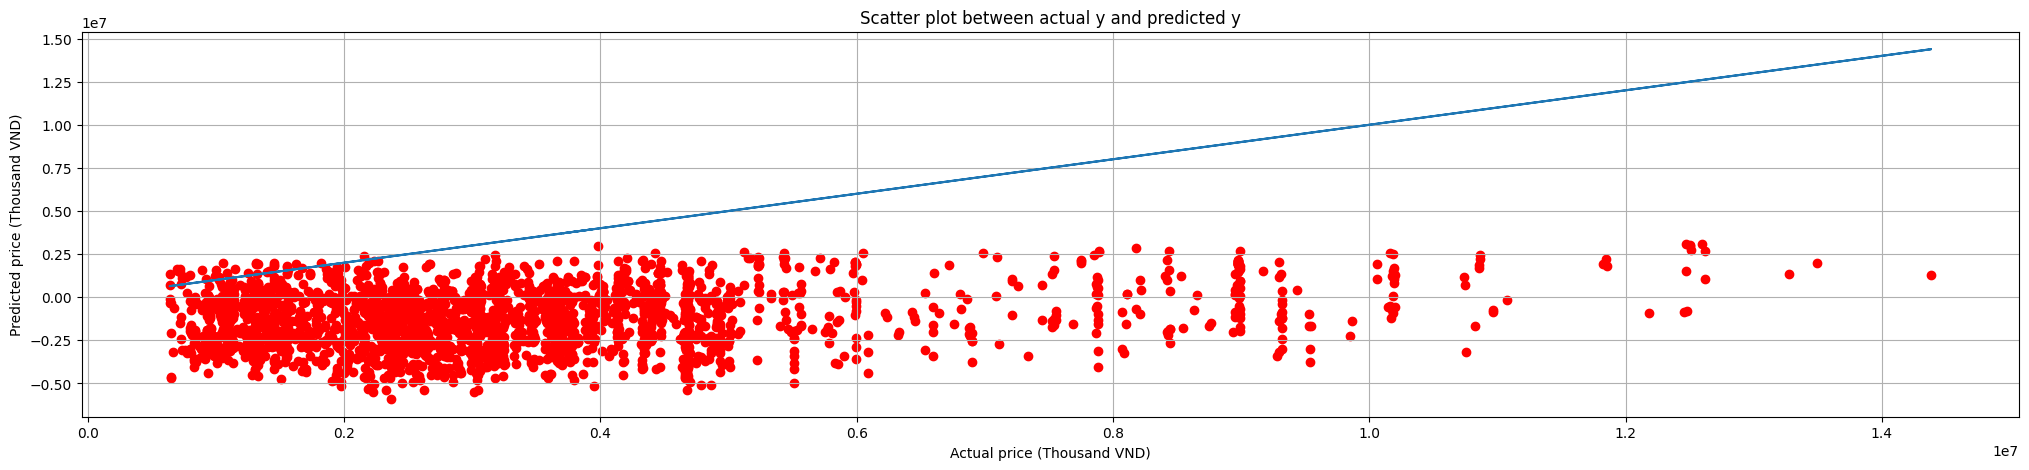

In [56]:
# Perform inference on the test data
y_test_pred = linear_reg.predict(X_test.values)

# Evaluate the model on the test data
test_mae, test_rmse, test_mape, test_r2 = linear_reg.evaluate(y_test_rf.values, y_test_pred)

# Print the evaluation metrics
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

print("Test MAPE:", test_mape)
print("Test R2:", test_r2)

# Plot the actual vs predicted values
linear_reg.plot_yy(25, 5, y_test_pred, y_test_rf.values)

Test MAE (selected features): 1442161.497990046
Test RMSE (selected features): 1864221.7366765654
Test MAPE (selected features): 0.6659113534854626
Test R2 (selected features): 0.21278531406860524


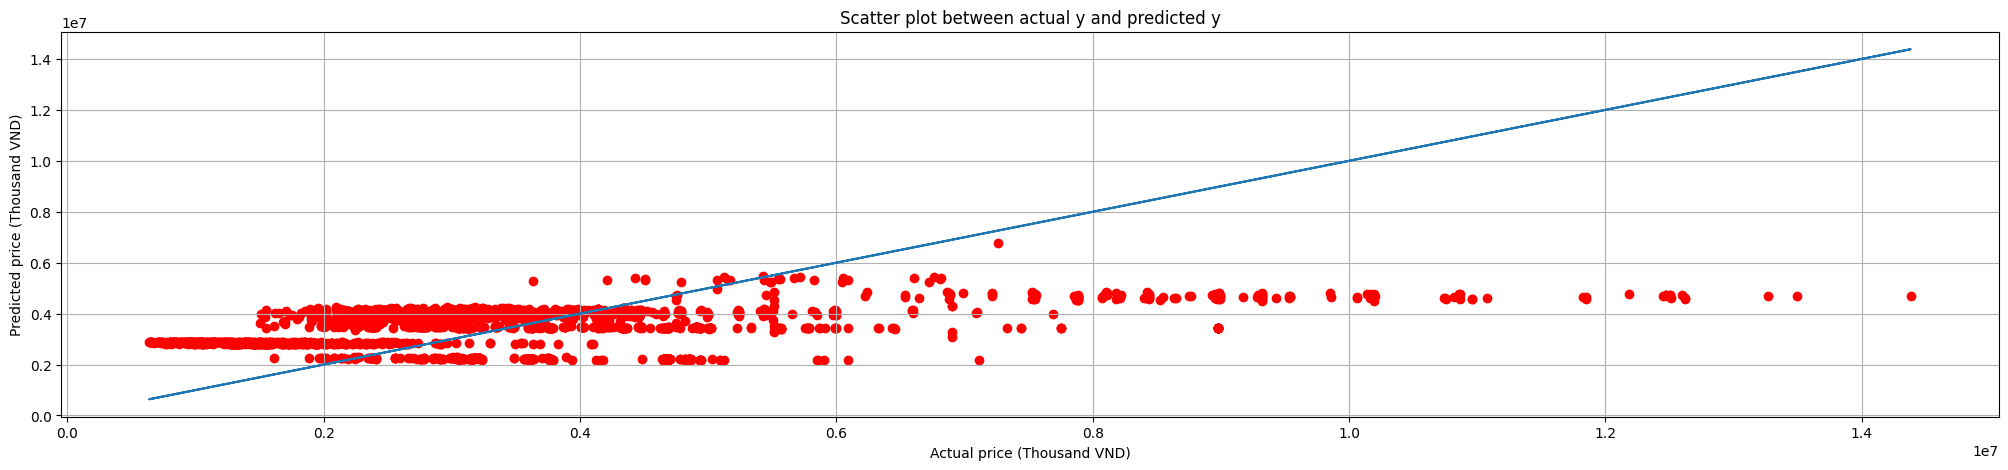

In [58]:
# Select the features for inference
X_test_selected = X_test[selected_features]

# Align the selected features with the training feature set by adding missing columns with zeros
X_test_aligned = pd.DataFrame(0, index=X_test.index, columns=X_train.columns)
X_test_aligned[selected_features] = X_test_selected

# Perform inference on the test data using the aligned features
y_test_pred_selected = linear_reg.predict(X_test_aligned.values)

# Evaluate the model on the test data with selected features
test_mae_selected, test_rmse_selected, test_mape_selected, test_r2_selected = linear_reg.evaluate(y_test_rf.values, y_test_pred_selected)

# Print the evaluation metrics
print("Test MAE (selected features):", test_mae_selected)
print("Test RMSE (selected features):", test_rmse_selected)
print("Test MAPE (selected features):", test_mape_selected)
print("Test R2 (selected features):", test_r2_selected)

# Plot the actual vs predicted values
linear_reg.plot_yy(25, 5, y_test_pred_selected, y_test_rf.values)